<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/projekt_1/class_wireless_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Ftrl

from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from keras.backend import clear_session

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
path_to_x_test = 'drive/MyDrive/MLF/projekt 1/x_test.csv' 
pd_x_test = pd.read_csv(path_to_x_test)

path_to_x_train = 'drive/MyDrive/MLF/projekt 1/x_train.csv' 
pd_x_train = pd.read_csv(path_to_x_train)

path_to_y_train = 'drive/MyDrive/MLF/projekt 1/y_train.csv' 
pd_y_train = pd.read_csv(path_to_y_train)

clasess = 8

In [101]:
x_train = pd_x_train.drop("Unnamed: 0", axis = 1)
x_train = x_train.drop("m_power", axis = 1)
x_train = x_train.drop("Tosc", axis = 1)
x_train = x_train.drop("Tmix", axis = 1)


x_test = pd_x_test.drop("Unnamed: 0", axis = 1)
x_test = x_test.drop("m_power", axis = 1)
x_test = x_test.drop("Tosc", axis = 1)
x_test = x_test.drop("Tmix", axis = 1)
x_test_pred = x_test

x_train, x_test, y_train, y_test = train_test_split(x_train,pd_y_train, test_size=0.2)

y_train = y_train.drop("id", axis = 1)
y_test = y_test.drop("id", axis = 1)

###Data preprocessing###

In [102]:
x_train_scaled = abs((x_train-x_train.min())/(x_train.max()-x_train.min()))

y_train = y_train -1

y_train_encoded = to_categorical(y_train, num_classes=clasess)

###Model building###

In [103]:
model = Sequential()
model.add(Flatten(input_shape=(clasess, 1)))      
model.add(Dense(128, activation='relu'))
#model.add(Dense(256, activation='sigmoid'))
model.add(Dense(clasess, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 2,184
Trainable params: 2,184
Non-trainable params: 0
_________________________________________________________________


In [104]:
optimizer = SGD(learning_rate = 0.2)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

###Model trainnig###

In [105]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split = 0.2)


Epoch 1/20
308/308 [==============================] - 2s 4ms/step - loss: 0.8328 - accuracy: 0.8243 - val_loss: 0.3790 - val_accuracy: 0.9536
Epoch 2/20
308/308 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9804 - val_loss: 0.1328 - val_accuracy: 0.9817
Epoch 3/20
308/308 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9900 - val_loss: 0.1022 - val_accuracy: 0.9731
Epoch 4/20
308/308 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9930 - val_loss: 0.0817 - val_accuracy: 0.9943
Epoch 5/20
308/308 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9950 - val_loss: 0.0503 - val_accuracy: 0.9919
Epoch 6/20
308/308 [==============================] - 1s 4ms/step - loss: 0.0437 - accuracy: 0.9957 - val_loss: 0.0521 - val_accuracy: 0.9951
Epoch 7/20
308/308 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9967 - val_loss: 0.0321 - val_accuracy: 0.9959
Epoch 

In [106]:
x_test_t = abs((x_test-x_test.min())/(x_test.max()-x_test.min()))
y_test = y_test -1
y_test_encoded = to_categorical(y_test, num_classes=clasess)

score = model.evaluate(x_test_t, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 2.78228759765625
Test accuracy: 70.08463740348816 %


In [107]:
pred_val = model.predict([x_test_pred])
print(pred_val.shape)
df = pd.DataFrame(pred_val)

row_numb = df.shape[0]

pred_numbs = np.argmax(pred_val, axis=1)
pred_numbs_res = pred_numbs.reshape ((row_numb,1))
print(row_numb)

pred_numbs_res = pred_numbs_res + 1

df = pd.DataFrame(pred_numbs_res)
df.columns = ["target"]
df.to_csv('filename.csv') 
files.download('filename.csv')

print(pred_numbs_res)

120/120 [==============================] - 0s 2ms/step
(3840, 8)
3840


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[5]
 [7]
 [5]
 ...
 [7]
 [7]
 [7]]


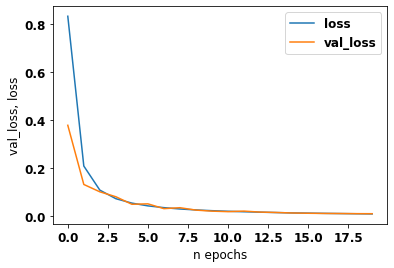

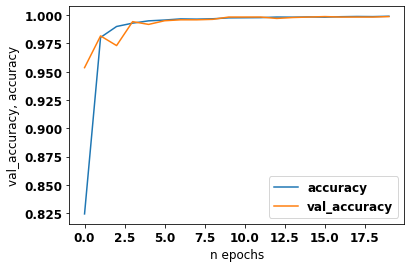

In [108]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()